### Домашнее задание "Проблема качества данных"

Необходимо запустить практическую часть занятия, и посмотреть самому то, о чём говорили на лекции. По образу практики, попробуйте создать искусственный датасет с лишними столбцами. Целевую метку, при правильной обработке данных, формируйте таким образом, чтобы без затруднений её смогла описать линейная модель. Ориентируйтесь на то, что было показано во время занятия, и каждый шаг описывайте в markdown. Здесь важно видеть ваш ход мысли. Не бойтесь ошибиться или написать не то. Данное задание не имеет какого-то “правильного” решения. Цель - достичь базового понимания проблемы. Чем больше вы фантазируете, тем лучше :) Тем не менее, старайтесь представить те ситуации, которые по-вашему мнению могли бы быть в реальных данных

In [19]:
# необходимые бибилотечки

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

#### Создадим искусственный датасет по посещаемости музея игрушек детьми и подростками. 

Показатели:
- Возраст ребенка в сопровождении взрослого от 3 до 16 лет (age)
- День недели посещения (day)
- Проведенное время в музее в часах, округляется до целого (time)
- Сумма в рублях, потраченная на сувениры и кафе в музее, при предъявлении билета (profit)

*Дети без взрослых не участвую в выборке*

In [32]:
n_samples = 1000

age = np.random.choice(range(3,17), n_samples)
day = np.random.choice(range(1,8), n_samples)
time = np.random.choice(range(1,13), n_samples) # 12 часов время работы музея 
profit = time * age * 10 

data = pd.DataFrame({'age': age, 'day': day, 'time': time, 'profit': profit})
data.head()

,age,day,time,profit
0,9,3,3,270
1,10,1,9,900
2,7,5,11,770
3,13,7,1,130
4,13,7,12,1560


визуально посмотрим на наш датасет, попробуем увидеть зависимости на графиках

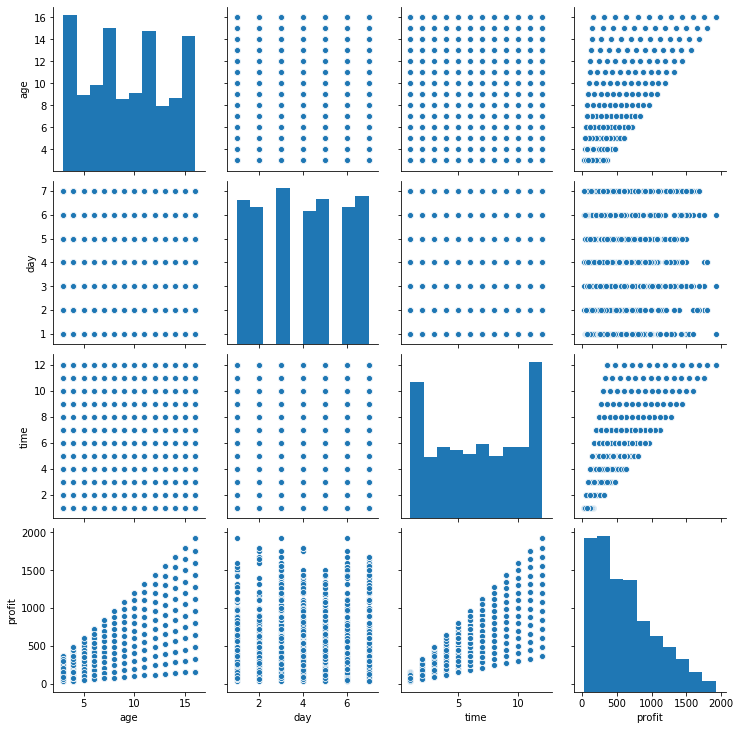

In [33]:
sns.pairplot(data)

In [34]:
# посмтроим линейную зависимость и посмотрим на модель

from sklearn.metrics import mean_absolute_error

X = data[['age', 'day', 'time']]
y = data['profit']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['age', 'day', 'time']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [65.11108761  3.88236542 92.42999787]
Bias: -618.4334140308712
Error: 107.49455092703703


Смещение очень большое, да и ошибка значимая

На графике видим, что распределение данных по показателю возраст (age) и время (time) имеют примерно оиданковую фигуру и влияют на потраченную сумму (profit)
Поэтому попытаемся улучшить нашау модель перемножив эти показатели

In [37]:
# добавляем новый признак в дата сет - ВремяВозраст, это произведеление показателей и обучаем модель на данном признаке
data['time_age'] = data['time'] * data['age']

X = data[['time_age']]
y = data['profit']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['time_age']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [10.]
Bias: 2.2737367544323206e-13
Error: 1.2599699061865978e-13


### Очевидный результат существенного улучшения модели за счет обучения на новом признаке. Отклонение, как и ошибка вообще несущественны